# Artificial Intelligence

## Project - Emotion and Gender Recognition from Speech 

## Developed By:

        Vrushank Shah

## Problem Formulation:

The aim is to predict emotions and gender from voice samples as recorded in Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS). This involves processing the audio files, extracting the physical features from voice samples and passing these features as input into a fully connected neural network model in order to predict the emotions and gender of the speaker.

## Data Pre-Processing

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn import metrics
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)

%matplotlib inline

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
RAVDESS = ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/")

In [4]:
dir_list = os.listdir(RAVDESS)
dir_list[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [5]:
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAVDESS + i)
    for f in fname:
        partition = f.split('.')[0].split('-')
        emotion.append(int(partition[2]))
        temp = int(partition[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAVDESS + i + '/' + f)

        
RAVDESS_df = pd.DataFrame(emotion)
RAVDESS_df = RAVDESS_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAVDESS_df = pd.concat([pd.DataFrame(gender),RAVDESS_df],axis=1)
RAVDESS_df.columns = ['gender','emotion']
RAVDESS_df['labels'] =RAVDESS_df.gender + '_' + RAVDESS_df.emotion
RAVDESS_df['source'] = 'RAVDESS'  
RAVDESS_df = pd.concat([RAVDESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAVDESS_df = RAVDESS_df.drop(['gender', 'emotion'], axis=1)
RAVDESS_df.labels.value_counts()

male_calm          96
female_surprise    96
female_sad         96
female_disgust     96
male_happy         96
male_fear          96
female_happy       96
male_angry         96
male_disgust       96
female_calm        96
male_sad           96
female_angry       96
female_fear        96
male_surprise      96
female_neutral     48
male_neutral       48
Name: labels, dtype: int64

In [6]:
RAVDESS_df

,labels,source,path
0,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
1,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
2,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
3,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
4,male_calm,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
...,...,...,...
1435,female_surprise,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
1436,female_surprise,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
1437,female_surprise,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
1438,female_surprise,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...


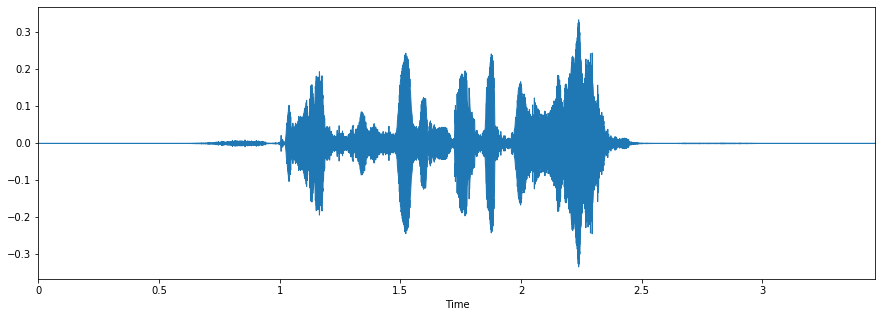

In [7]:
# Fearful audio track
fname = RAVDESS + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Playing the audio 
ipd.Audio(fname)

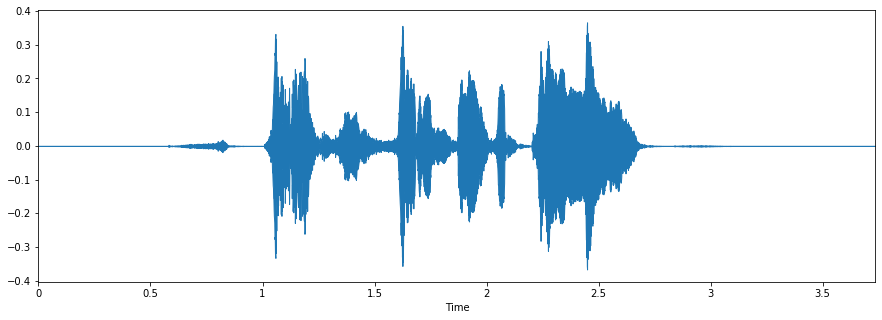

In [8]:
# Happy audio track
fname = RAVDESS + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Playing the audio 
ipd.Audio(fname)

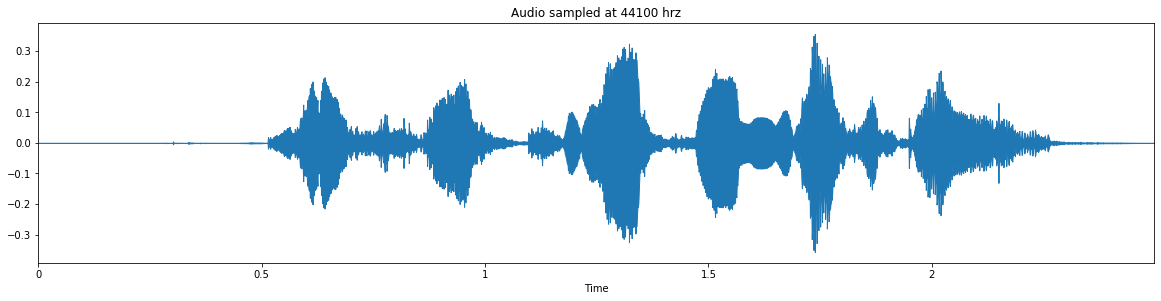

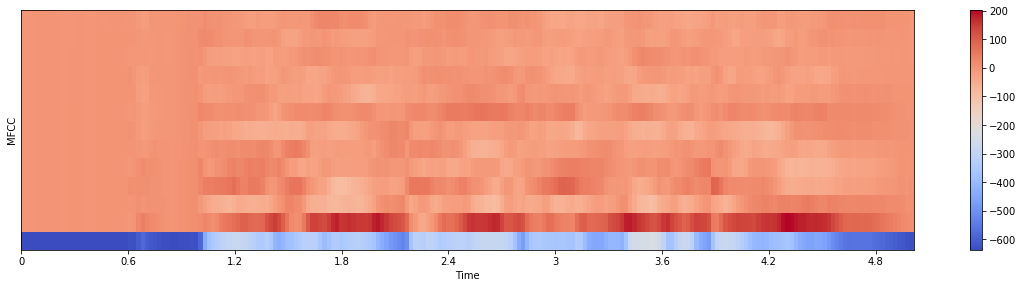

In [9]:
# Gender - Female; Emotion - Angry 
path = ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav")
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Generate audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# Plot MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

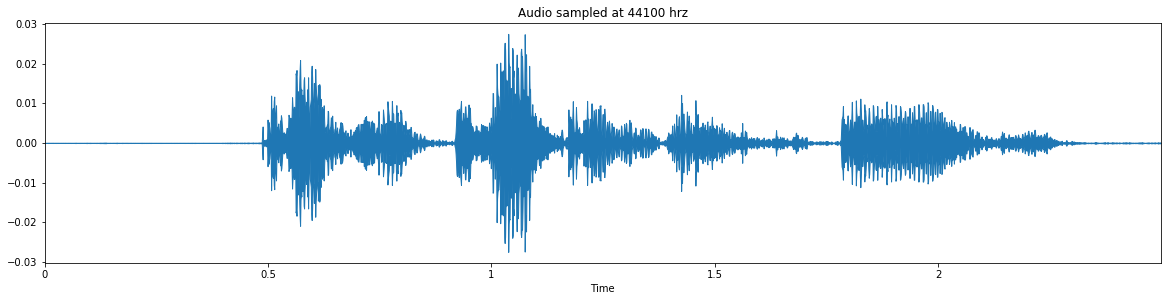

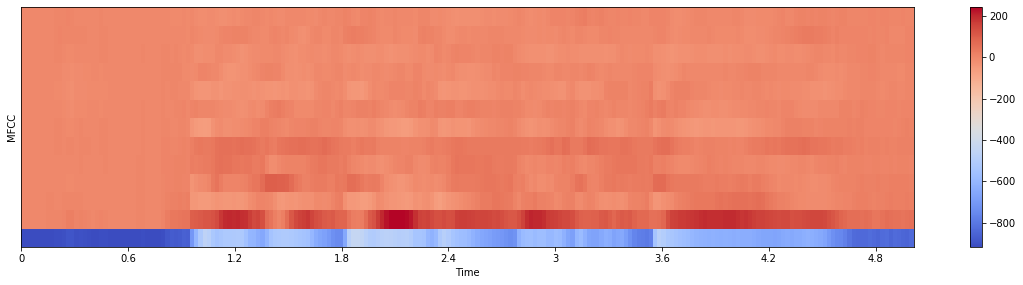

In [10]:
# Gender - Male; Emotion - Angry 
path = ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav")
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Generate audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# Plot MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

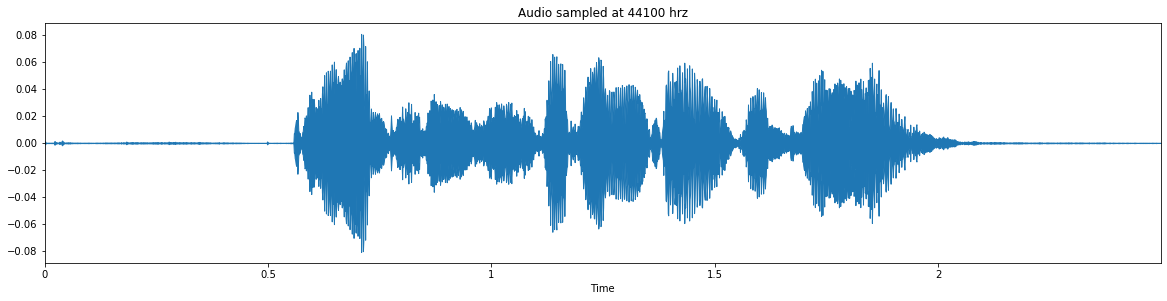

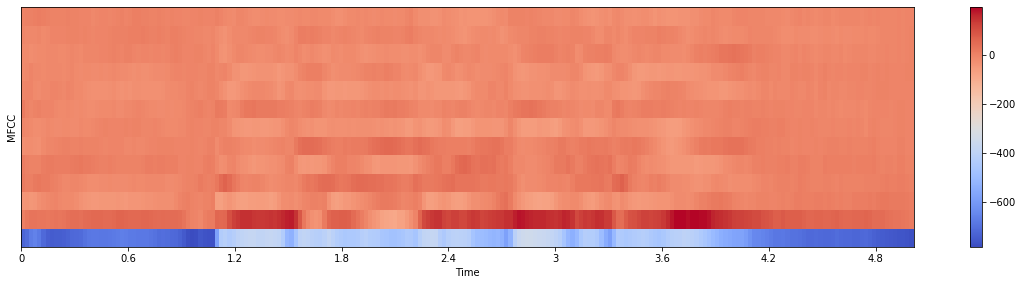

In [11]:
# Gender - Female; Emotion - Happy 
path = ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav")
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Generate audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# Plot MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

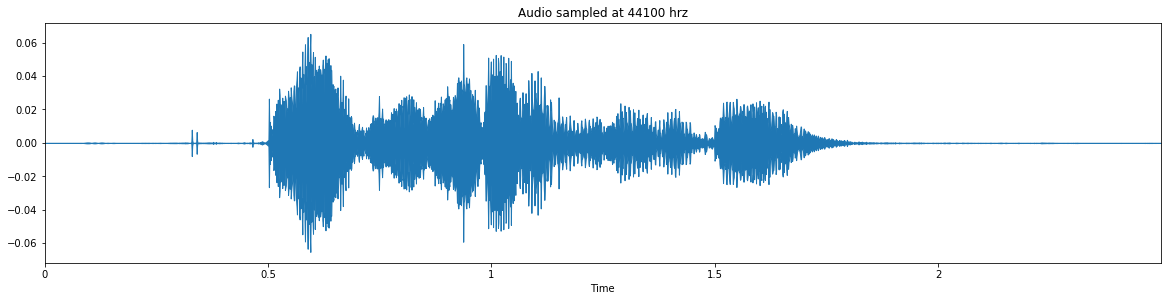

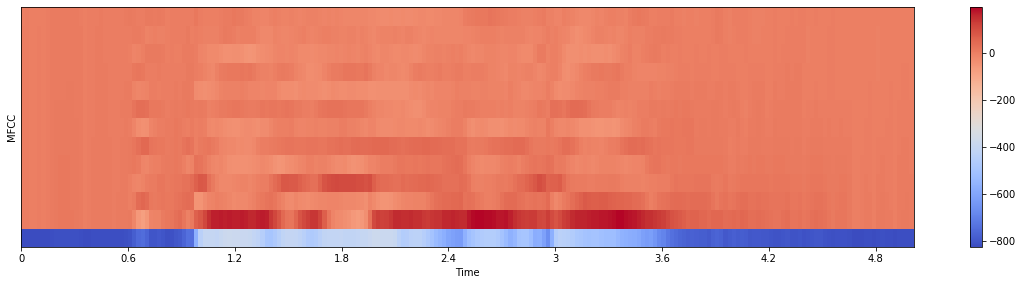

In [12]:
# Gender - Male; Emotion - Happy 
path = ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav")
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# Generate audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# Plot MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)


216
216


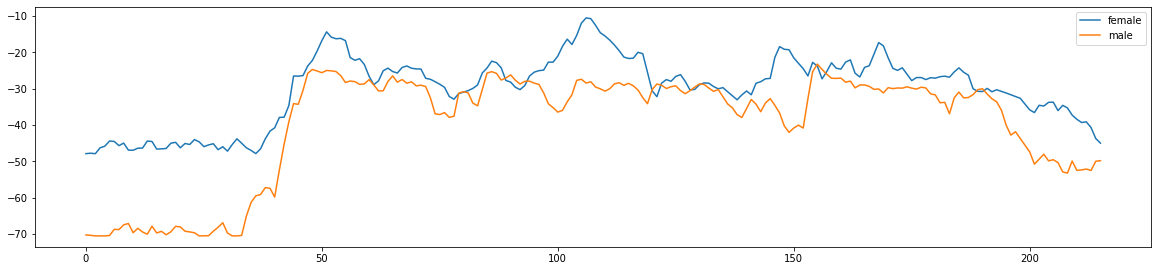

In [13]:
# Gender - Female; Emotion - Angry 
path = ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav")
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - Angry 
path = ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav")
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


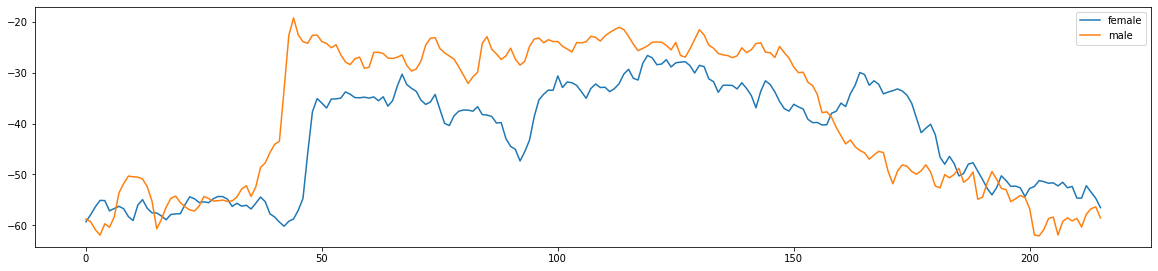

In [14]:
# Gender - Female; Emotion - happy 
path =  ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav")
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - happy 
path =  ("C:/Users/16696/Desktop/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav")
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [15]:
RAVDESS_df.to_csv(r'C:\Users\16696\Desktop\Data_path.csv',index=False)

In [16]:
import os
from keras.utils import np_utils, to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
  
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import IPython.display as ipd

Using TensorFlow backend.


In [17]:
data = pd.read_csv(r'C:\Users\16696\Desktop\Data_path.csv')
data.head()

,labels,source,path
0,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
1,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
2,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
3,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...
4,male_calm,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...


In [18]:
data_df = pd.DataFrame(columns=['feature']) # Create a dataframe with column named 'Feature'

# Run a loop over the entire dataset to extract features 
counter=0
for index,path in enumerate(data.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    # Calculate mean of MFCC as the feature.
    mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
    data_df.loc[counter] = [mfccs]
    counter=counter+1   

print(len(data_df))
data_df.head()

1440


,feature
0,"[-65.80097, -65.80097, -65.80097, -65.80097, -..."
1,"[-61.84995, -62.89504, -63.830643, -60.55259, ..."
2,"[-65.81886, -65.81886, -65.81886, -65.81886, -..."
3,"[-66.05848, -66.05848, -66.05848, -66.05848, -..."
4,"[-70.26777, -70.26777, -70.26777, -70.26777, -..."


In [19]:
# Extract the mean bands to its own feature columns
data_df = pd.concat([data,pd.DataFrame(data_df['feature'].values.tolist())],axis=1)
data_df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,-58.299904,-62.295246,-64.930122,-65.332123,-64.116928,-64.319901,-64.971420,-63.155781,-64.178665,-63.061897
1,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...,-61.849949,-62.895039,-63.830643,-60.552589,-60.821678,-62.073402,-64.889229,...,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946
2,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,...,-65.818863,-65.818863,-65.818863,-65.818863,-65.438057,-65.684845,-65.818863,-65.818863,-65.818863,-65.818863
3,male_neutral,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,-57.539616,-55.826313,-57.741985,-59.796383,-60.975368,-62.663059,-64.573486,-63.782612,-61.515793,-58.214882
4,male_calm,RAVDESS,C:/Users/16696/Desktop/RAVDESS/audio_speech_ac...,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-58.802044,-57.447456,-58.896500,-58.750999,-57.405678,-60.078484,-63.426800,-62.638542,-61.082741,-60.234657


In [20]:
print(data_df.isnull().sum()) #Check for null values

labels    0
source    0
path      0
0         0
1         0
         ..
211       1
212       1
213       2
214       2
215       2
Length: 219, dtype: int64


In [21]:
data_df.columns

Index(['labels', 'source',   'path',        0,        1,        2,        3,
              4,        5,        6,
       ...
            206,      207,      208,      209,      210,      211,      212,
            213,      214,      215],
      dtype='object', length=219)

In [22]:
data_df = data_df.drop(['path','source'],axis=1)

In [23]:
data_df

,labels,0,1,2,3,4,5,6,7,8,...,206,207,208,209,210,211,212,213,214,215
0,male_neutral,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,-58.299904,-62.295246,-64.930122,-65.332123,-64.116928,-64.319901,-64.971420,-63.155781,-64.178665,-63.061897
1,male_neutral,-61.849949,-62.895039,-63.830643,-60.552589,-60.821678,-62.073402,-64.889229,-65.389946,-65.389946,...,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946,-65.389946
2,male_neutral,-65.818863,-65.818863,-65.818863,-65.818863,-65.805527,-65.818863,-65.818863,-65.629547,-64.802628,...,-65.818863,-65.818863,-65.818863,-65.818863,-65.438057,-65.684845,-65.818863,-65.818863,-65.818863,-65.818863
3,male_neutral,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,-66.058479,...,-57.539616,-55.826313,-57.741985,-59.796383,-60.975368,-62.663059,-64.573486,-63.782612,-61.515793,-58.214882
4,male_calm,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-58.802044,-57.447456,-58.896500,-58.750999,-57.405678,-60.078484,-63.426800,-62.638542,-61.082741,-60.234657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,female_surprise,-58.988811,-58.988811,-60.665466,-60.689579,-59.735569,-60.501480,-60.420517,-59.816246,-60.189266,...,-58.988811,-58.988811,-58.988811,-58.916397,-58.988811,-58.988811,-58.988811,-58.988811,-58.988811,-58.988811
1436,female_surprise,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,-54.677158,...,-38.598324,-38.009247,-40.035812,-39.657108,-40.550026,-43.559956,-45.444458,-46.496014,-46.470699,-47.322220
1437,female_surprise,-56.940815,-56.940815,-56.940815,-56.940815,-56.940815,-56.943367,-57.077042,-56.940815,-56.940815,...,-43.485588,-42.686462,-44.226131,-44.101891,-43.651344,-45.493496,-47.759686,-50.536514,-51.336388,-50.690861
1438,female_surprise,-55.255135,-55.255135,-55.186653,-55.345295,-55.053387,-53.088173,-52.199917,-52.218304,-52.633877,...,-47.927132,-50.145126,-48.712173,-47.603027,-45.205410,-44.438683,-48.720501,-50.850349,-50.327168,-48.915749


In [24]:
# Replace the missing values with the median of that column
for column_name in data_df.columns[1:217]:
    missing_median(data_df, column_name)

In [25]:
print(data_df.isnull().sum()) #Check for null values

labels    0
0         0
1         0
2         0
3         0
         ..
211       0
212       0
213       0
214       0
215       0
Length: 217, dtype: int64


In [26]:
# Normalize the numeric features using z-score normalization
for column_name in data_df.columns[1:217]:
    encode_numeric_zscore(data_df, column_name)

In [27]:
data_df

,labels,0,1,2,3,4,5,6,7,8,...,206,207,208,209,210,211,212,213,214,215
0,male_neutral,-1.162147,-1.200224,-1.210326,-1.211096,-1.206140,-1.207246,-1.199010,-1.195614,-1.207931,...,-1.045685,-1.361342,-1.565093,-1.581411,-1.467794,-1.472370,-1.502606,-1.325116,-1.323712,-1.140999
1,male_neutral,-0.697758,-0.855365,-0.974279,-0.581935,-0.612333,-0.765067,-1.092127,-1.147572,-1.159726,...,-1.655002,-1.626289,-1.604353,-1.586364,-1.577624,-1.565066,-1.538859,-1.519496,-1.418834,-1.305770
2,male_neutral,-1.164250,-1.202347,-1.212470,-1.213241,-1.206683,-1.209369,-1.201107,-1.175577,-1.090846,...,-1.691863,-1.663009,-1.640974,-1.623111,-1.581775,-1.590612,-1.576012,-1.556813,-1.452517,-1.336127
3,male_neutral,-1.192414,-1.230783,-1.241176,-1.241966,-1.236849,-1.237793,-1.229197,-1.225712,-1.238131,...,-0.980346,-0.807517,-0.951365,-1.107151,-1.196754,-1.328842,-1.468136,-1.379652,-1.114594,-0.797945
4,male_calm,-1.687159,-1.730317,-1.745453,-1.746564,-1.738829,-1.737116,-1.722649,-1.717709,-1.731792,...,-1.088839,-0.946308,-1.049938,-1.017591,-0.888778,-1.104946,-1.368808,-1.280114,-1.080586,-0.940897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,female_surprise,-0.361470,-0.391797,-0.595088,-0.598357,-0.482809,-0.578599,-0.568264,-0.496099,-0.549796,...,-1.104890,-1.078268,-1.057820,-1.031761,-1.025363,-1.010550,-0.984382,-0.962575,-0.916149,-0.852721
1436,female_surprise,0.145307,0.119885,0.122317,0.122396,0.120433,0.112306,0.105024,0.104576,0.096658,...,0.647464,0.717855,0.560401,0.618226,0.565451,0.326019,0.188852,0.124342,0.066907,-0.027002
1437,female_surprise,-0.120755,-0.148753,-0.148871,-0.148965,-0.149520,-0.156521,-0.176312,-0.160008,-0.168821,...,0.227454,0.317424,0.202629,0.237431,0.297883,0.158520,-0.011697,-0.227196,-0.315199,-0.265422
1438,female_surprise,0.077374,0.051294,0.061279,0.042301,0.075566,0.300798,0.395429,0.391975,0.336292,...,-0.154252,-0.321134,-0.180393,-0.062519,0.163806,0.249896,-0.094924,-0.254501,-0.235944,-0.139786


In [28]:
#Create a copy and drop 'labels' to separate target feature from other feautures
data_df_copy = data_df.copy()
data_df_copy.drop('labels',axis=1,inplace=True)

In [29]:
#Create variables x and y for the train_test_split function
x = data_df_copy
y = data_df['labels']

In [30]:
x

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-1.162147,-1.200224,-1.210326,-1.211096,-1.206140,-1.207246,-1.199010,-1.195614,-1.207931,-1.211951,...,-1.045685,-1.361342,-1.565093,-1.581411,-1.467794,-1.472370,-1.502606,-1.325116,-1.323712,-1.140999
1,-0.697758,-0.855365,-0.974279,-0.581935,-0.612333,-0.765067,-1.092127,-1.147572,-1.159726,-1.163833,...,-1.655002,-1.626289,-1.604353,-1.586364,-1.577624,-1.565066,-1.538859,-1.519496,-1.418834,-1.305770
2,-1.164250,-1.202347,-1.212470,-1.213241,-1.206683,-1.209369,-1.201107,-1.175577,-1.090846,-1.214046,...,-1.691863,-1.663009,-1.640974,-1.623111,-1.581775,-1.590612,-1.576012,-1.556813,-1.452517,-1.336127
3,-1.192414,-1.230783,-1.241176,-1.241966,-1.236849,-1.237793,-1.229197,-1.225712,-1.238131,-1.242098,...,-0.980346,-0.807517,-0.951365,-1.107151,-1.196754,-1.328842,-1.468136,-1.379652,-1.114594,-0.797945
4,-1.687159,-1.730317,-1.745453,-1.746564,-1.738829,-1.737116,-1.722649,-1.717709,-1.731792,-1.734878,...,-1.088839,-0.946308,-1.049938,-1.017591,-0.888778,-1.104946,-1.368808,-1.280114,-1.080586,-0.940897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-0.361470,-0.391797,-0.595088,-0.598357,-0.482809,-0.578599,-0.568264,-0.496099,-0.549796,-0.545817,...,-1.104890,-1.078268,-1.057820,-1.031761,-1.025363,-1.010550,-0.984382,-0.962575,-0.916149,-0.852721
1436,0.145307,0.119885,0.122317,0.122396,0.120433,0.112306,0.105024,0.104576,0.096658,0.090310,...,0.647464,0.717855,0.560401,0.618226,0.565451,0.326019,0.188852,0.124342,0.066907,-0.027002
1437,-0.120755,-0.148753,-0.148871,-0.148965,-0.149520,-0.156521,-0.176312,-0.160008,-0.168821,-0.208390,...,0.227454,0.317424,0.202629,0.237431,0.297883,0.158520,-0.011697,-0.227196,-0.315199,-0.265422
1438,0.077374,0.051294,0.061279,0.042301,0.075566,0.300798,0.395429,0.391975,0.336292,0.447044,...,-0.154252,-0.321134,-0.180393,-0.062519,0.163806,0.249896,-0.094924,-0.254501,-0.235944,-0.139786


In [31]:
y

0          male_neutral
1          male_neutral
2          male_neutral
3          male_neutral
4             male_calm
             ...       
1435    female_surprise
1436    female_surprise
1437    female_surprise
1438    female_surprise
1439    female_surprise
Name: labels, Length: 1440, dtype: object

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [33]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
96,-0.325724,-0.355705,-0.357788,-0.358016,-0.357485,-0.363139,-0.386127,-0.376926,-0.417321,-0.434253,...,-1.054948,-0.952448,-0.875512,-0.762943,-0.695417,-0.695360,-0.497703,-0.430015,-0.293601,-0.284441
1166,-1.122715,-1.160410,-1.170135,-1.170879,-1.166131,-1.167449,-1.159681,-1.156401,-1.168585,-1.172676,...,-1.504933,-1.632793,-1.491254,-1.474727,-1.483433,-1.448306,-1.510770,-1.510447,-1.382235,-1.283734
439,0.366552,0.228300,0.083179,0.087891,0.162666,0.057527,0.445961,0.448108,0.464876,0.561713,...,0.578891,0.545623,0.586025,0.519793,0.434719,0.541120,0.580753,0.427209,0.210787,0.332603
1360,0.343821,0.306811,0.309237,0.228680,0.199412,0.134986,0.136157,0.170253,0.300097,0.400588,...,-0.574466,-0.595703,-0.640271,-0.599894,-0.616290,-0.599134,-0.495805,-0.512943,-0.542840,-0.516644
410,0.875901,0.608891,0.400743,0.376917,0.378537,0.278808,-0.046918,0.162282,0.690236,0.950534,...,0.447301,1.685211,2.197690,2.338978,2.234580,2.069652,2.060486,2.031270,1.815931,1.683473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.828670,-0.652218,-1.147658,-1.280667,-1.275349,-0.790832,-0.568066,-1.064810,-0.702236,-0.005075,...,0.622095,0.630349,0.597732,0.457431,0.363460,0.267185,0.184767,0.398394,0.362280,0.332023
1130,0.554356,0.471673,0.336068,0.267346,0.264632,0.255742,0.246773,0.392778,0.620045,0.590185,...,0.860095,0.830216,0.767908,0.801405,1.009125,1.075025,1.039401,0.898202,1.367344,1.589953
1294,1.005749,0.985960,0.996616,0.995309,0.983948,0.980737,0.974048,0.959635,0.938479,0.940188,...,1.168203,1.260911,1.175611,1.112920,1.167004,1.274290,1.415833,1.510365,2.186831,2.437564
860,2.245199,1.907513,0.948651,0.938679,0.854606,0.754518,0.581145,0.544757,0.576993,0.395892,...,-0.547756,-0.223630,-0.264014,-0.335957,-0.340850,-0.493412,-0.047814,0.077065,-0.198101,-0.230258


In [34]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
168,1.204091,0.948926,0.243082,-0.099549,-0.124067,-0.221020,-0.285109,-0.478892,-0.415894,-0.376558,...,1.540292,1.560477,1.484214,1.335940,1.381848,1.505672,1.659897,1.715211,1.601503,1.424977
605,-1.053365,-0.099706,0.188910,-0.006466,-0.037689,0.006543,-0.006282,-0.117565,0.031843,-0.063870,...,-0.274262,-0.201281,-0.199517,-0.233815,-0.360192,-0.672292,-0.815865,-0.732126,-0.710022,-0.681853
548,0.687654,0.988160,1.050941,0.823920,0.604543,0.786866,0.854964,0.725216,0.826884,0.880303,...,0.105238,-0.036320,0.023303,0.146667,-0.020014,-0.092466,-0.099215,-0.155276,-0.064786,-0.238245
65,-1.100684,-1.138166,-1.147679,-1.148410,-1.143778,-1.145215,-1.137708,-1.134493,-1.146602,-1.150733,...,0.888211,0.895572,0.881051,0.805492,0.857543,0.901217,0.988697,0.973781,0.650882,0.609849
628,0.581730,0.549701,0.663245,0.749539,0.899746,0.787276,0.700489,0.640592,0.424455,0.313654,...,0.141169,0.043053,-0.088582,-0.059825,0.013050,0.094480,-0.056374,-0.142364,-0.330989,-0.369695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0.687340,0.751086,0.922555,1.186184,1.122509,1.021583,0.805092,0.773722,0.942565,0.940330,...,1.359023,1.590376,1.799195,1.783340,1.887571,1.918005,1.683798,1.558919,2.674552,2.942793
1133,-0.645837,-0.173457,0.171599,0.009465,0.101554,0.237972,-0.023961,-0.002943,0.003185,-0.074652,...,0.532713,0.391916,0.194789,0.228794,-0.048056,-0.126307,-0.209147,-0.280590,-0.300850,-0.341063
1190,-0.221210,-0.197848,-0.154969,-0.149091,-0.183596,-0.268068,-0.270876,-0.270217,-0.218389,-0.273866,...,0.220281,0.186227,0.159765,0.149380,0.071867,0.001995,-0.035279,-0.168052,-0.248709,0.145451
438,0.176457,0.717135,0.878696,0.519579,0.830655,0.706635,0.769165,0.844118,0.681374,0.465715,...,0.531938,0.513473,0.438134,0.454200,0.610119,0.531313,0.299280,0.322514,0.345814,0.269493


In [35]:
y_train

96       female_fear
1166      female_sad
439     female_happy
1360       male_fear
410     male_disgust
            ...     
1095      male_happy
1130    male_disgust
1294    female_angry
860         male_sad
1126    male_disgust
Name: labels, Length: 1008, dtype: object

In [36]:
y_test

168       male_disgust
605          male_calm
548        female_calm
65         female_calm
628         male_angry
             ...      
591     female_disgust
1133     male_surprise
1190    female_disgust
438       female_happy
672       female_happy
Name: labels, Length: 432, dtype: object

In [37]:
#Label Encoding the target feature
#Convert a class vector (integers) to binary class matrix using to_categorical() function.
#This function takes a vector or 1 column matrix of class labels and converts it into a matrix with p columns, one for each category. This is the format most commonly used in the fitting and predicting of neural networks.
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [38]:
print(lb.classes_)

['female_angry' 'female_calm' 'female_disgust' 'female_fear'
 'female_happy' 'female_neutral' 'female_sad' 'female_surprise'
 'male_angry' 'male_calm' 'male_disgust' 'male_fear' 'male_happy'
 'male_neutral' 'male_sad' 'male_surprise']


## Neural Network

In [39]:
import os
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [40]:
x_train.values.astype(np.float32)
x_test.values.astype(np.float32)

array([[ 1.2040914 ,  0.9489264 ,  0.24308178, ...,  1.7152114 ,
         1.6015025 ,  1.4249775 ],
       [-1.0533655 , -0.09970605,  0.18890986, ..., -0.73212636,
        -0.7100216 , -0.68185264],
       [ 0.6876538 ,  0.98815966,  1.0509412 , ..., -0.15527564,
        -0.06478608, -0.23824513],
       ...,
       [-0.22120953, -0.19784811, -0.15496948, ..., -0.16805215,
        -0.24870874,  0.14545123],
       [ 0.17645675,  0.7171352 ,  0.87869626, ...,  0.32251427,
         0.3458143 ,  0.26949322],
       [-0.7474493 , -0.781512  , -0.787639  , ..., -0.09096793,
        -0.15806162, -0.18832795]], dtype=float32)

In [50]:
checkpointer = ModelCheckpoint(filepath=r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_1111.hdf5', verbose=0, save_best_only=True)


model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    
model.fit(x_train, y_train, validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=500)

print('Training finished...Loading the best model')  
print()
model.load_weights(r'C:\Users\16696\Desktop\AI_Final_Project\best_weights_1111.hdf5')

# Measure accuracy
predict_neural = model.predict(x_test)
predict_neural = np.argmax(predict_neural,axis=1)

y_true = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_true, predict_neural)
print("Final accuracy: {}".format(score))

Train on 1008 samples, validate on 432 samples
Epoch 1/500
1008/1008 - 1s - loss: 2.5506 - val_loss: 2.3419
Epoch 2/500
1008/1008 - 0s - loss: 2.2078 - val_loss: 2.0739
Epoch 3/500
1008/1008 - 0s - loss: 1.9882 - val_loss: 2.0873
Epoch 4/500
1008/1008 - 0s - loss: 1.8256 - val_loss: 2.0450
Epoch 5/500
1008/1008 - 0s - loss: 1.7295 - val_loss: 2.0945
Epoch 6/500
1008/1008 - 0s - loss: 1.5812 - val_loss: 2.0579
Epoch 7/500
1008/1008 - 0s - loss: 1.4920 - val_loss: 1.9858
Epoch 8/500
1008/1008 - 0s - loss: 1.3709 - val_loss: 2.1353
Epoch 9/500
1008/1008 - 0s - loss: 1.2540 - val_loss: 2.0965
Epoch 10/500
1008/1008 - 0s - loss: 1.1871 - val_loss: 2.0235
Epoch 11/500
1008/1008 - 0s - loss: 1.0863 - val_loss: 2.2268
Epoch 12/500
1008/1008 - 0s - loss: 1.0655 - val_loss: 2.3988
Epoch 00012: early stopping
Training finished...Loading the best model

Final accuracy: 0.3287037037037037


In [51]:
# Make Predictions
preds = model.predict(x_test, batch_size=16, verbose=1)

preds = preds.argmax(axis=1)
preds

432/432 [==============================] - 0s 208us/sample


array([10,  9,  7,  1,  8, 15,  1,  6,  4,  9,  0,  7, 10,  3,  9,  2,  8,
       11,  2,  1,  4,  1,  1, 11,  3, 15, 15, 14, 12, 12,  8, 12,  8,  8,
        9, 15, 10,  8,  3, 10,  1,  4,  6,  8, 15,  9,  1, 14,  2,  3, 14,
        3,  0, 11,  1,  9,  6,  7, 15, 14, 15,  2, 15,  3,  4,  7,  4, 14,
        4, 12,  7,  4,  1,  4, 12,  9,  8,  3, 10,  0, 12,  4, 11,  4,  3,
        8,  3,  1, 14,  6,  1,  1,  0, 12,  4, 10, 11, 12,  4, 12,  1,  0,
       11, 14, 12,  0,  1,  4, 15, 11,  3,  0,  4,  9,  2,  2,  0,  8,  8,
       11,  4,  1,  1, 11, 11,  8,  3, 12,  3,  0, 15,  8, 11, 11,  1,  7,
        1,  9,  2,  2,  8,  9,  0,  7,  0, 11,  8, 15, 15,  3, 11,  1,  1,
       15,  3, 11,  4,  1, 12,  3, 11, 12,  8,  3,  4,  1,  8,  6,  1,  7,
        1, 11,  0,  1,  0,  1, 15, 12, 15,  6,  4,  4,  4, 15,  1, 11,  5,
       11,  0,  7, 12,  6,  4,  1,  1,  7, 15,  3,  7,  1,  0, 14, 15,  6,
        8,  0, 15,  4, 11, 15,  4, 11,  6,  4,  1, 11,  4,  3,  7, 11,  6,
        0,  3,  6, 12,  1

In [52]:
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual = y_test.argmax(axis=1)
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Combine both of them into a single dataframe
emotions_df = actual.join(preds)
emotions_df.head()

,actualvalues,predictedvalues
0,male_disgust,male_disgust
1,male_calm,male_calm
2,female_calm,female_surprise
3,female_calm,female_calm
4,male_angry,male_angry


In [53]:
emotions_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,36
female_calm,63
female_disgust,17
female_fear,29
female_happy,45
female_neutral,3
female_sad,18
female_surprise,20
male_angry,35


In [54]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from scipy import interp
import itertools
from itertools import cycle
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    fig = plt.figure()
    fig.set_size_inches(10,7)
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

Confusion matrix without normalization
[[10  0  2  2  5  0  0  0  4  1  0  3  1  0  0  0]
 [ 1 27  2  0  1  0  6  1  0  2  0  0  0  0  0  0]
 [ 5  8 10  1  6  1  1  1  0  1  0  0  0  0  1  0]
 [ 4  1  3  8  4  0  4  2  0  0  0  1  0  0  0  0]
 [ 6  3  0  5 12  0  1  3  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  1  0  1  1  0  0  0  0  0  0  0  0]
 [ 0 11  0  3  3  1  4  0  0  0  0  0  0  0  0  1]
 [ 2  2  0  7 11  1  1  7  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 15  0  2  4  3  0  0  3]
 [ 0  0  0  0  1  0  0  0  1 14  4  1  1  0  1  5]
 [ 0  0  0  3  0  0  0  1  4  1  5  4  4  0  3  2]
 [ 3  0  0  0  0  0  0  0  2  0  1 10  0  0  1  2]
 [ 1  0  0  0  0  0  0  1  7  0  1  5  4  0  3  3]
 [ 0  0  0  0  1  0  0  0  0  1  0  5  1  0  4  2]
 [ 0  3  0  0  0  0  0  3  1  3  3  6  5  0  6  5]
 [ 3  0  0  0  0  0  0  0  1  2  0  7  4  0  3 10]]


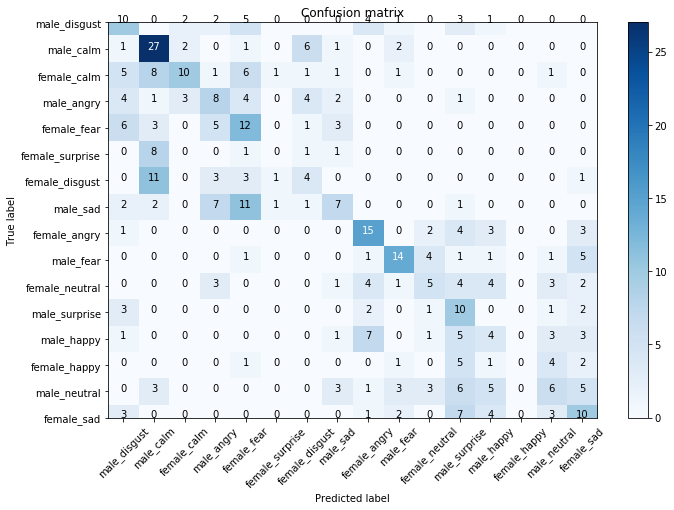

In [55]:
plot_confusion_matrix(confusion_matrix(emotions_df.actualvalues,emotions_df.predictedvalues), 
                      classes = emotions_df.actualvalues.unique())

In [56]:
# Classification report 
classes = emotions_df.actualvalues.unique()
classes.sort()    
print(classification_report(emotions_df.actualvalues, emotions_df.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.28      0.36      0.31        28
    female_calm       0.43      0.68      0.52        40
 female_disgust       0.59      0.29      0.38        35
    female_fear       0.28      0.30      0.29        27
   female_happy       0.27      0.40      0.32        30
 female_neutral       0.00      0.00      0.00        11
     female_sad       0.22      0.17      0.20        23
female_surprise       0.35      0.22      0.27        32
     male_angry       0.43      0.54      0.48        28
      male_calm       0.56      0.50      0.53        28
   male_disgust       0.31      0.19      0.23        27
      male_fear       0.21      0.53      0.30        19
     male_happy       0.17      0.16      0.17        25
   male_neutral       0.00      0.00      0.00        14
       male_sad       0.27      0.17      0.21        35
  male_surprise       0.30      0.33      0.32        30

       accuracy              

Accuracy:  0.9143518518518519
Confusion matrix without normalization
[[210  16]
 [ 21 185]]


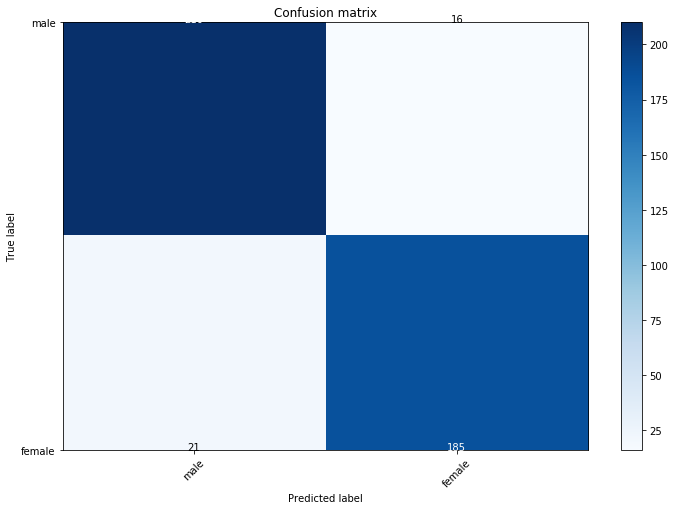

In [57]:
#Gender Classification
gender_df = emotions_df
gender_df['actualvalues'] = emotions_df.actualvalues.replace({'female_angry':'female', 'female_disgust':'female', 'female_fear':'female', 'female_happy':'female', 'female_sad':'female', 'female_surprise':'female', 'female_neutral':'female', 'male_angry':'male', 'male_fear':'male', 'male_happy':'male', 'male_sad':'male', 'male_surprise':'male', 'male_neutral':'male', 'male_disgust':'male', 'female_calm':'female', 'male_calm':'male'})

gender_df['predictedvalues'] = emotions_df.predictedvalues.replace({'female_angry':'female', 'female_disgust':'female', 'female_fear':'female', 'female_happy':'female', 'female_sad':'female', 'female_surprise':'female', 'female_neutral':'female', 'male_angry':'male', 'male_fear':'male', 'male_happy':'male', 'male_sad':'male', 'male_surprise':'male', 'male_neutral':'male', 'male_disgust':'male', 'female_calm':'female', 'male_calm':'male'})

classes = gender_df.actualvalues.unique()  
classes.sort() 

#Print accuracy for predicting gender
print("Accuracy: ",accuracy_score(gender_df.actualvalues, gender_df.predictedvalues))

#Plot confusion matrix
plot_confusion_matrix(confusion_matrix(gender_df.actualvalues,gender_df.predictedvalues), classes=gender_df.actualvalues.unique())

In [58]:
print(classification_report(gender_df.actualvalues, gender_df.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.91      0.93      0.92       226
        male       0.92      0.90      0.91       206

    accuracy                           0.91       432
   macro avg       0.91      0.91      0.91       432
weighted avg       0.91      0.91      0.91       432

